# Distribution Analysis Notebook

This notebook analyzes the distribution of images in subdirectories of a dataset.

You can upload a `.zip` file (e.g., `Apple.zip`) as the dataset source.

Zipped folder content format:
```
% find . -maxdepth 2 | grep Apple
./Apple
./Apple/apple_healthy
./Apple/apple_rust
./Apple/apple_scab
./Apple/apple_black_rot
```

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
import tempfile

In [56]:
def is_image_file(filename):
    try:
        if not filename:
            raise ValueError('Filename cannot be empty or None.')
        valid_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tif', '.tiff'}
        return os.path.splitext(filename.lower())[1] in valid_extensions
    except Exception as e:
        print(f'Error in is_image_file: {e}')
        raise

In [57]:
def analyze_distribution(dataset_path):
    try:
        if dataset_path.lower().endswith('.zip'):
            base_name = os.path.splitext(os.path.basename(dataset_path))[0]
            extract_path = os.getcwd()
            with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
                zip_ref.extractall(extract_path)

            possible_path = os.path.join(extract_path, base_name)
            if os.path.isdir(possible_path):
                dataset_path = possible_path
            else:
                dataset_path = extract_path
            dataset_name = base_name

        if not os.path.isdir(dataset_path):
            raise NotADirectoryError(f'{dataset_path} is not a valid directory.')

        dataset_name = os.path.basename(os.path.abspath(dataset_path)) if 'dataset_name' not in locals() else dataset_name
        distribution = {}

        for entry in os.scandir(dataset_path):
            if entry.is_dir():
                try:
                    subdir_name = os.path.basename(entry.path)
                    dataset_prefix = dataset_name.lower() + "_"
                    if subdir_name.lower().startswith(dataset_prefix):
                        subdir_name = subdir_name[len(dataset_prefix):]

                    image_count = sum(
                        1 for _, _, files in os.walk(entry.path)
                        for f in files if is_image_file(f)
                    )
                    distribution[subdir_name] = image_count
                except Exception as e:
                    print(f'Error processing directory {entry.path}: {e}')

        if not distribution:
            print(f'No valid image subdirectories found in {dataset_path}.')
            return

        labels = list(distribution.keys())
        counts = list(distribution.values())

        cmap = plt.get_cmap('tab10')
        colors = [cmap(i) for i in np.linspace(0, 1, len(labels))]

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f'{dataset_name} Distribution (Pie)')

        plt.subplot(1, 2, 2)
        plt.bar(labels, counts, color=colors)
        plt.title(f'{dataset_name} Distribution (Bar)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        plt.show()
    except Exception as e:
        print(f'Error in analyze_distribution: {e}')

## Using the Notebook in Google Colab

1. Upload your `.zip` file (e.g., `Apple.zip`) using the file upload feature in Colab.
2. The uploaded file will be stored in the `/content` directory.
3. Call the `analyze_distribution` function with the path to the uploaded file, e.g., `/content/Apple.zip`.

Saving Apple.zip to Apple.zip


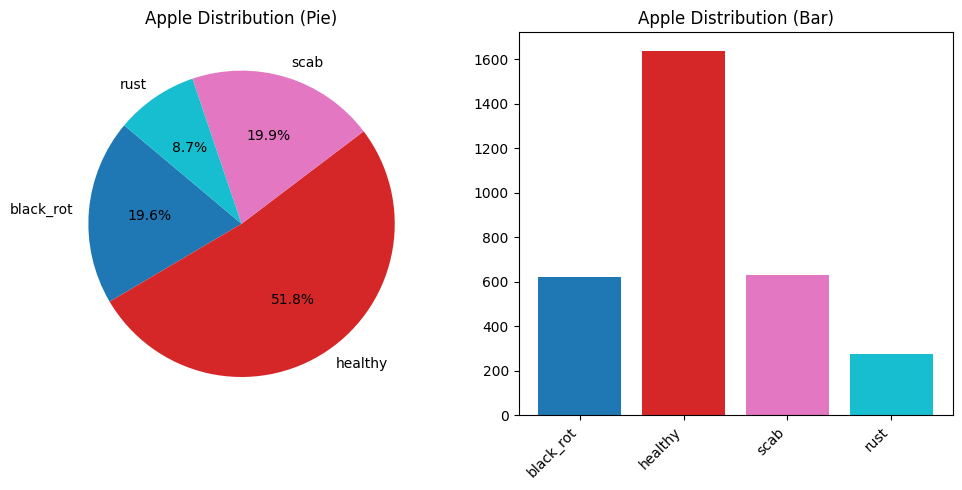

In [60]:
from google.colab import files

uploaded = files.upload()

zip_file_path = list(uploaded.keys())[0]

analyze_distribution(zip_file_path)

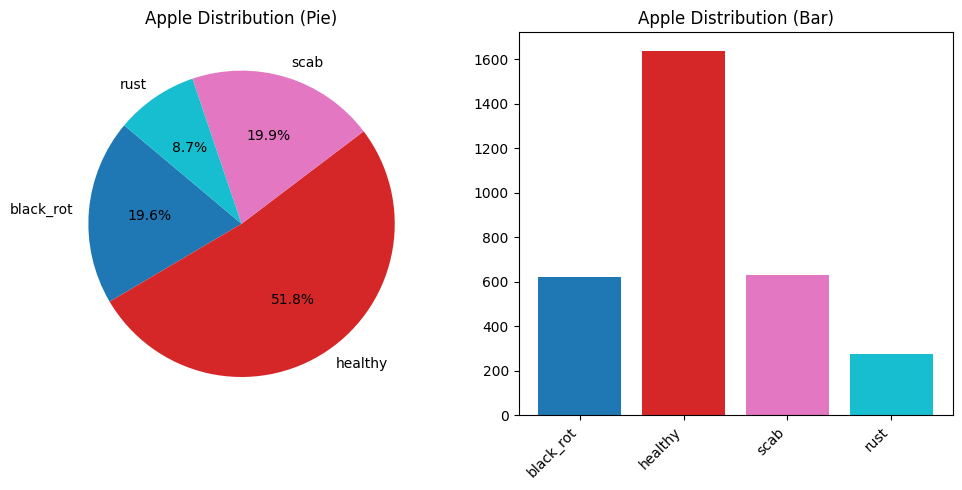

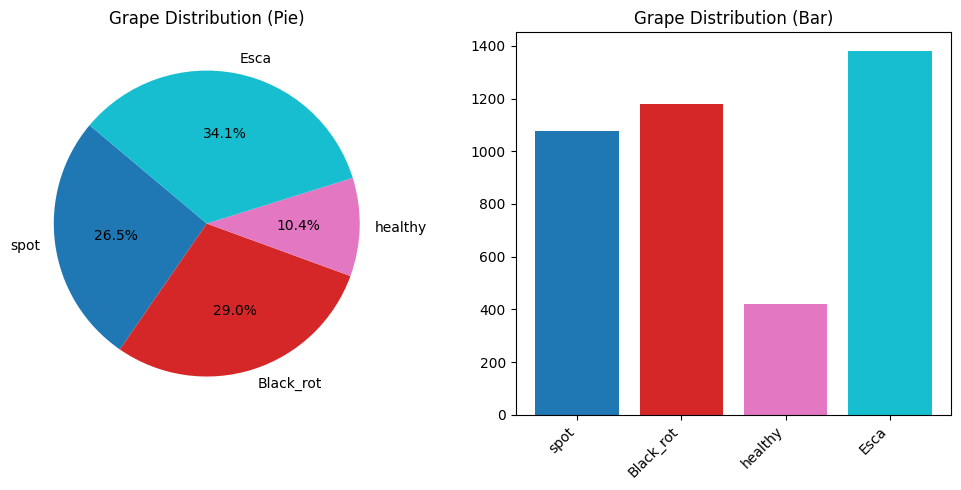

In [61]:
analyze_distribution('/content/Apple.zip')
print()
analyze_distribution('/content/Grape.zip')

In [ ]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [59]:
!df -h /content
# !rm -fr Apple/ Grape/

Filesystem      Size  Used Avail Use% Mounted on
overlay         226G   19G  208G   9% /
